# Global Happiness - Identify the main groups of countries and their global happiness characteristics using
K-Means clustering after performing dimensionality reduction (PCA)

In [1]:
import pandas as pd 
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from numpy import percentile
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.decomposition import PCA
import geopandas
import matplotlib.colors
import pycountry 



import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
import seaborn as sns
#import squarify


warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/Users/boss/Desktop/Happiness-Data.csv')


In [3]:
df.describe()

,LadderScore,StandardErrorOfLadderScore,upperwhisker,lowerwhisker,LoggedGDPperCapita,SocialSupport,HealthyLifeExpectancy,FreedomToMakeLifeChoices,Generosity,PerceptionsOfCorruption,LadderScoreInDystopia,Explainedby:LogGDPperCapita,Explainedby:SocialSupport,Explainedby:HealthyLifeExpectancy,Explainedby:FreedomToMakeLifeChoices,Explainedby:Generosity,Explainedby:PerceptionsOfCorruption,Dystopia_residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,1.490000e+02,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.430000e+00,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,5.347044e-15,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.430000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.430000e+00,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.430000e+00,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.430000e+00,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.430000e+00,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


## Identification and treatment of any Missing Values;  

In [4]:
MVF = ["NA","N/A", "na", "?","__", "  "]
df1=df
df = pd.read_csv("/Users/boss/Desktop/Happiness-Data.csv", na_values = MVF)

In [5]:
df.corr()

,LadderScore,StandardErrorOfLadderScore,upperwhisker,lowerwhisker,LoggedGDPperCapita,SocialSupport,HealthyLifeExpectancy,FreedomToMakeLifeChoices,Generosity,PerceptionsOfCorruption,LadderScoreInDystopia,Explainedby:LogGDPperCapita,Explainedby:SocialSupport,Explainedby:HealthyLifeExpectancy,Explainedby:FreedomToMakeLifeChoices,Explainedby:Generosity,Explainedby:PerceptionsOfCorruption,Dystopia_residual
LadderScore,1.000000,-0.470787,0.999347,0.999396,0.789760,0.756888,0.768099,0.607753,-0.017799,-0.421140,NaN,0.789745,0.756869,0.768138,0.607793,-0.017631,0.421205,0.492010
StandardErrorOfLadderScore,-0.470787,1.000000,-0.438612,-0.501150,-0.645799,-0.530815,-0.583805,-0.275182,0.138349,0.276997,NaN,-0.645776,-0.531010,-0.583806,-0.275171,0.138580,-0.277041,0.136827
upperwhisker,0.999347,-0.438612,1.000000,0.997489,0.777995,0.749215,0.758455,0.607797,-0.012616,-0.417560,NaN,0.777981,0.749187,0.758494,0.607838,-0.012435,0.417624,0.506880
lowerwhisker,0.999396,-0.501150,0.997489,1.000000,0.800064,0.763299,0.776364,0.606944,-0.022794,-0.423976,NaN,0.800048,0.763288,0.776402,0.606983,-0.022638,0.424042,0.477204
LoggedGDPperCapita,0.789760,-0.645799,0.777995,0.800064,1.000000,0.785299,0.859461,0.432323,-0.199286,-0.342337,NaN,1.000000,0.785174,0.859488,0.432383,-0.199532,0.342332,-0.041119
SocialSupport,0.756888,-0.530815,0.749215,0.763299,0.785299,1.000000,0.723256,0.482930,-0.114946,-0.203207,NaN,0.785287,0.999996,0.723284,0.482896,-0.114913,0.203366,0.006681
HealthyLifeExpectancy,0.768099,-0.583805,0.758455,0.776364,0.859461,0.723256,1.000000,0.461494,-0.161750,-0.364374,NaN,0.859446,0.723155,0.999999,0.461485,-0.161767,0.364452,-0.023433
FreedomToMakeLifeChoices,0.607753,-0.275182,0.607797,0.606944,0.432323,0.482930,0.461494,1.000000,0.169437,-0.401363,NaN,0.432350,0.483069,0.461454,0.999994,0.169587,0.401372,0.100242
Generosity,-0.017799,0.138349,-0.012616,-0.022794,-0.199286,-0.114946,-0.161750,0.169437,1.000000,-0.163962,NaN,-0.199229,-0.114909,-0.161863,0.169261,0.999994,0.163924,-0.027212
PerceptionsOfCorruption,-0.421140,0.276997,-0.417560,-0.423976,-0.342337,-0.203207,-0.364374,-0.401363,-0.163962,1.000000,NaN,-0.342310,-0.203422,-0.364303,-0.401069,-0.164171,-0.999996,0.004478


In [6]:
# print the sum of null values
print(df.isnull().sum())

CountryName                             0
RegionalIndicator                       0
LadderScore                             0
StandardErrorOfLadderScore              0
upperwhisker                            0
lowerwhisker                            0
LoggedGDPperCapita                      0
SocialSupport                           0
HealthyLifeExpectancy                   0
FreedomToMakeLifeChoices                0
Generosity                              0
PerceptionsOfCorruption                 0
LadderScoreInDystopia                   0
Explainedby:LogGDPperCapita             0
Explainedby:SocialSupport               0
Explainedby:HealthyLifeExpectancy       0
Explainedby:FreedomToMakeLifeChoices    0
Explainedby:Generosity                  0
Explainedby:PerceptionsOfCorruption     0
Dystopia_residual                       0
dtype: int64


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   CountryName                           149 non-null    object 
 1   RegionalIndicator                     149 non-null    object 
 2   LadderScore                           149 non-null    float64
 3   StandardErrorOfLadderScore            149 non-null    float64
 4   upperwhisker                          149 non-null    float64
 5   lowerwhisker                          149 non-null    float64
 6   LoggedGDPperCapita                    149 non-null    float64
 7   SocialSupport                         149 non-null    float64
 8   HealthyLifeExpectancy                 149 non-null    float64
 9   FreedomToMakeLifeChoices              149 non-null    float64
 10  Generosity                            149 non-null    float64
 11  PerceptionsOfCorrup

In [8]:
df.dtypes

CountryName                              object
RegionalIndicator                        object
LadderScore                             float64
StandardErrorOfLadderScore              float64
upperwhisker                            float64
lowerwhisker                            float64
LoggedGDPperCapita                      float64
SocialSupport                           float64
HealthyLifeExpectancy                   float64
FreedomToMakeLifeChoices                float64
Generosity                              float64
PerceptionsOfCorruption                 float64
LadderScoreInDystopia                   float64
Explainedby:LogGDPperCapita             float64
Explainedby:SocialSupport               float64
Explainedby:HealthyLifeExpectancy       float64
Explainedby:FreedomToMakeLifeChoices    float64
Explainedby:Generosity                  float64
Explainedby:PerceptionsOfCorruption     float64
Dystopia_residual                       float64
dtype: object

In [9]:
def shape(x):
    print('Shape of the dataframe is', x.shape)
shape(df)

Shape of the dataframe is (149, 20)


<AxesSubplot:>

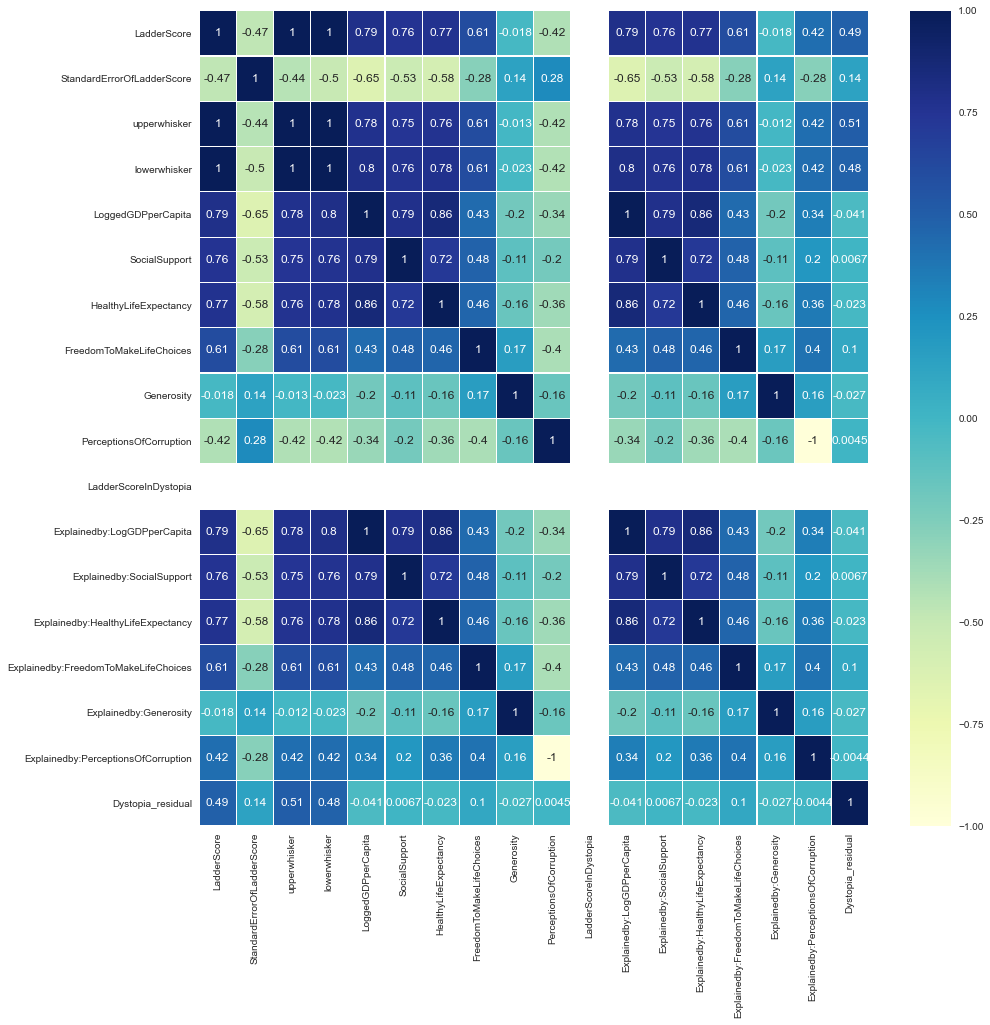

In [10]:
plt.figure(figsize =(15,15))
sns.heatmap(df.corr(), annot= True, cmap="YlGnBu", vmin=-1, vmax=1, linewidths=.2)

In [11]:
#Since the mentioned columns have strong correlation we are dropping it, it can be seen in heatmap
df = df.drop(labels=['CountryName', 'RegionalIndicator', 'upperwhisker','lowerwhisker','LadderScoreInDystopia', 'Explainedby:LogGDPperCapita', 'Explainedby:SocialSupport', 'Explainedby:HealthyLifeExpectancy', 'Explainedby:FreedomToMakeLifeChoices', 'Explainedby:Generosity', 'Explainedby:PerceptionsOfCorruption'], axis=1)


In [12]:
df.head(10)

,LadderScore,StandardErrorOfLadderScore,LoggedGDPperCapita,SocialSupport,HealthyLifeExpectancy,FreedomToMakeLifeChoices,Generosity,PerceptionsOfCorruption,Dystopia_residual
0,7.842,0.032,10.775,0.954,72.0,0.949,-0.098,0.186,3.253
1,7.620,0.035,10.933,0.954,72.7,0.946,0.030,0.179,2.868
2,7.571,0.036,11.117,0.942,74.4,0.919,0.025,0.292,2.839
3,7.554,0.059,10.878,0.983,73.0,0.955,0.160,0.673,2.967
4,7.464,0.027,10.932,0.942,72.4,0.913,0.175,0.338,2.798
5,7.392,0.035,11.053,0.954,73.3,0.960,0.093,0.270,2.580
6,7.363,0.036,10.867,0.934,72.7,0.945,0.086,0.237,2.683
7,7.324,0.037,11.647,0.908,72.6,0.907,-0.034,0.386,2.653
8,7.277,0.040,10.643,0.948,73.4,0.929,0.134,0.242,2.612
9,7.268,0.036,10.906,0.934,73.3,0.908,0.042,0.481,2.784


<AxesSubplot:>

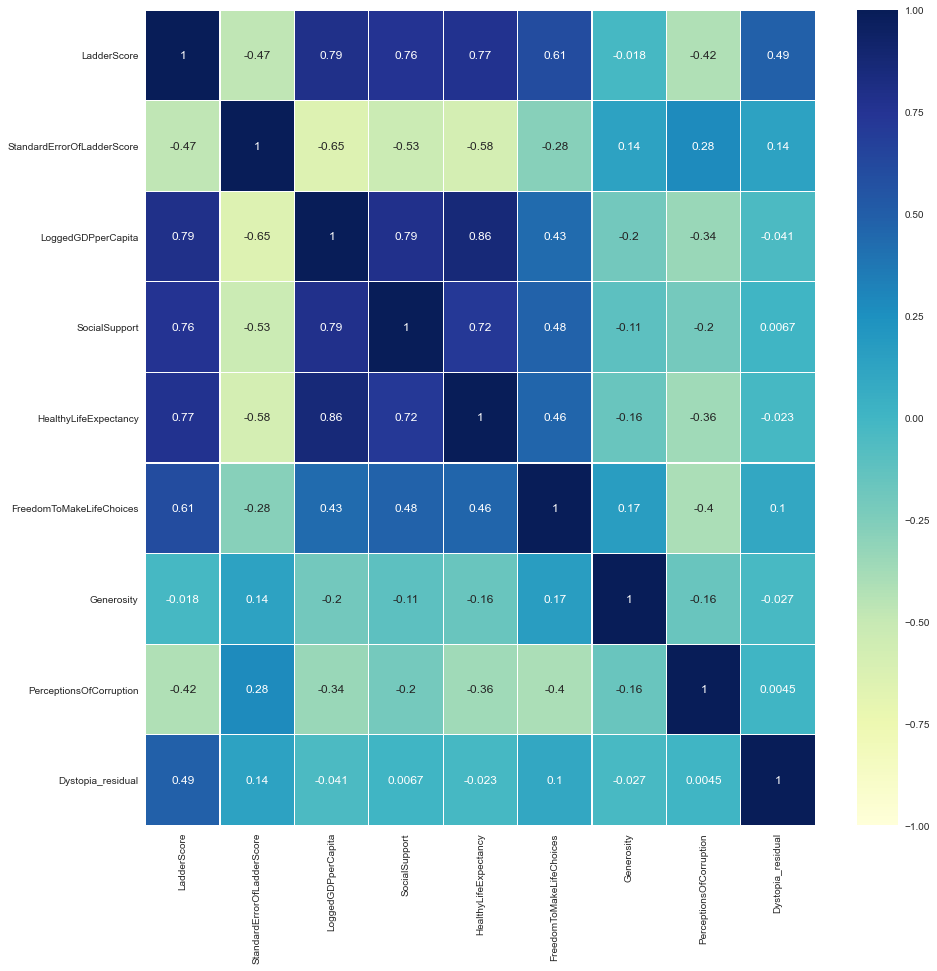

In [13]:
plt.figure(figsize =(15,15))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", vmin=-1, vmax=1, linewidths=.2)

## Identification and treatment of any Outliers;

[]

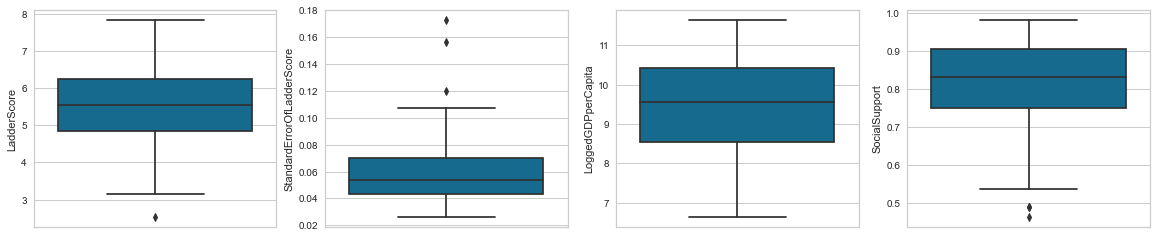

In [14]:
plt.figure(figsize=(20,4))
plt.subplot(1,4,1)
sns.boxplot(y = df['LadderScore'])
plt.subplot(1,4,2)
sns.boxplot(y = df['StandardErrorOfLadderScore'])
plt.subplot(1,4,3)
sns.boxplot(y = df['LoggedGDPperCapita'])
plt.subplot(1,4,4)
sns.boxplot(y = df['SocialSupport'])

plt.plot()


[]

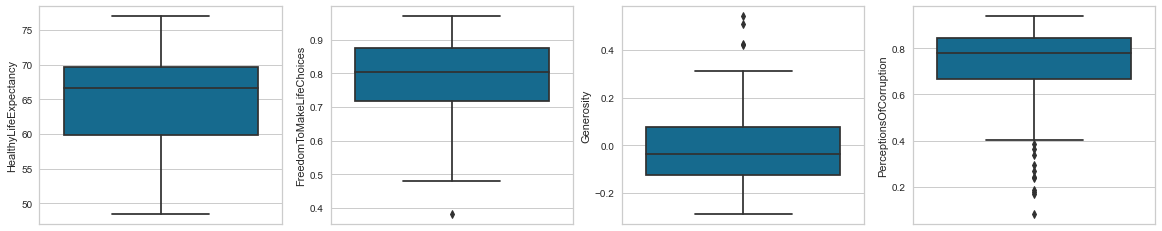

In [15]:
plt.figure(figsize=(20,4))
plt.subplot(1,4,1)
sns.boxplot(y = df['HealthyLifeExpectancy'])
plt.subplot(1,4,2)
sns.boxplot(y = df['FreedomToMakeLifeChoices'])
plt.subplot(1,4,3)
sns.boxplot(y = df['Generosity'])
plt.subplot(1,4,4)
sns.boxplot(y = df['PerceptionsOfCorruption'])

plt.plot()

[]

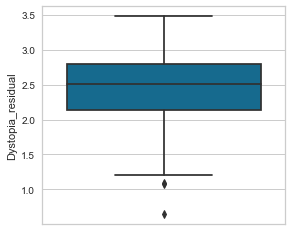

In [16]:
plt.figure(figsize=(20,4))
plt.subplot(1,4,1)
sns.boxplot(y = df['Dystopia_residual'])


plt.plot()



In [17]:
df = df[df['LadderScore']>3]
df = df[df['StandardErrorOfLadderScore']<0.12]
df = df[df['FreedomToMakeLifeChoices']>0.5]
df = df[df['Generosity']<0.4]
df = df[df['Dystopia_residual']>1.2]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 0 to 147
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LadderScore                 138 non-null    float64
 1   StandardErrorOfLadderScore  138 non-null    float64
 2   LoggedGDPperCapita          138 non-null    float64
 3   SocialSupport               138 non-null    float64
 4   HealthyLifeExpectancy       138 non-null    float64
 5   FreedomToMakeLifeChoices    138 non-null    float64
 6   Generosity                  138 non-null    float64
 7   PerceptionsOfCorruption     138 non-null    float64
 8   Dystopia_residual           138 non-null    float64
dtypes: float64(9)
memory usage: 10.8 KB


### Here we have removed most of the columns that are having outliers.

## Data Normalisation; 

Eliminating first two variables(viz. data types) as we cannot normalise the valriable that are having string values.
we need to scale the continuous features. We will be using scikit-learn’s StandardScaler as the feature matrix is a mix of binary and continuous features .

<AxesSubplot:ylabel='Density'>

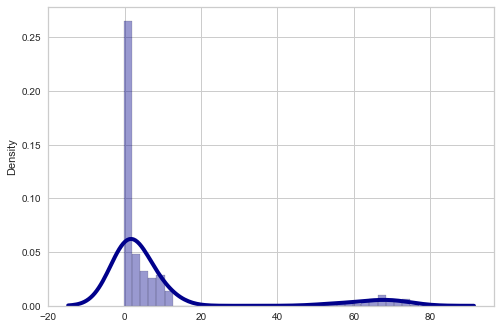

In [19]:
#Density Plot and Histogram before Normalization
sns.distplot(df, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [20]:
#Normalize the data attributes 
from sklearn import preprocessing
import pandas as pd
scaler = preprocessing.MinMaxScaler()
names = df.columns
d = scaler.fit_transform(df)
s_df = pd.DataFrame(d, columns=names)
s_df.head()

,LadderScore,StandardErrorOfLadderScore,LoggedGDPperCapita,SocialSupport,HealthyLifeExpectancy,FreedomToMakeLifeChoices,Generosity,PerceptionsOfCorruption,Dystopia_residual
0,1.000000,0.074074,0.826018,0.941296,0.826058,0.952809,0.317195,0.121354,0.899429
1,0.952736,0.111111,0.857542,0.941296,0.850641,0.946067,0.530885,0.113186,0.730347
2,0.942304,0.123457,0.894254,0.917004,0.910342,0.885393,0.522538,0.245041,0.717611
3,0.938684,0.407407,0.846568,1.000000,0.861176,0.966292,0.747913,0.689615,0.773825
4,0.919523,0.012346,0.857342,0.917004,0.840105,0.871910,0.772955,0.298716,0.699605


<AxesSubplot:ylabel='Density'>

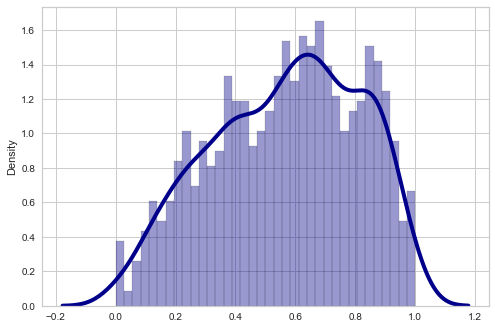

In [21]:
#Density Plot and Histogram after Normalization
sns.distplot(s_df, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

## Dimensionality Reduction Using PCA; 

([<matplotlib.axis.XTick at 0x7fab8fc552b0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

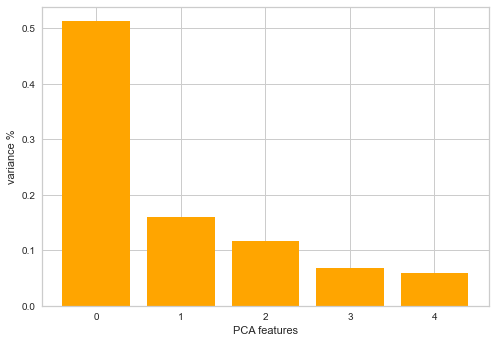

In [22]:
#Dimensionality Reduction Using PCA

pca = PCA(n_components=5)
principalComponents = pca.fit_transform(s_df)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='orange')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)



## Eigen Values

In [23]:
pca.explained_variance_ratio_

array([0.51279735, 0.1604753 , 0.11690041, 0.06729768, 0.05967806])

## The percentage of variation explained by each eigen Vector

In [24]:
print(pca.components_)

[[-0.40568722  0.35635804 -0.44487037 -0.39785263 -0.43969503 -0.32695771
   0.01039406  0.22776482  0.0035427 ]
 [-0.25587465 -0.25591165  0.18835559  0.12327229  0.16497908 -0.43179912
  -0.48590438  0.25723161 -0.54993069]
 [-0.25941817 -0.14235599 -0.07082263 -0.02964189 -0.04294855  0.1869766
   0.60469869 -0.26127951 -0.6601592 ]
 [-0.01732089 -0.01878329  0.022313   -0.34767763  0.02271386 -0.24018932
  -0.30493351 -0.85241945  0.01262477]
 [ 0.15662408 -0.14222436  0.14355485  0.12253079  0.06154457 -0.76738647
   0.5288382  -0.01436491  0.21696409]]


In [25]:
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)
PCA_components

,0,1,2,3,4
0,-0.875006,-0.363122,-0.183526,0.410650,-0.043748
1,-0.865501,-0.360552,0.061887,0.353321,0.031234
2,-0.840049,-0.276096,0.015957,0.268452,0.071301
3,-0.650231,-0.415697,-0.022356,-0.234265,0.093564
4,-0.803926,-0.352520,0.190083,0.149411,0.212013
...,...,...,...,...,...
133,1.184508,-0.286852,-0.056380,0.417380,-0.005568
134,0.680303,0.425426,0.101470,0.070361,0.000126
135,0.528367,-0.026864,0.750831,0.090066,-0.176759
136,0.916164,-0.177138,0.254393,0.153655,-0.232567


# Find the ideal number of clusters – justify it by showing two different/methods (via manual or automated tools);
A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.

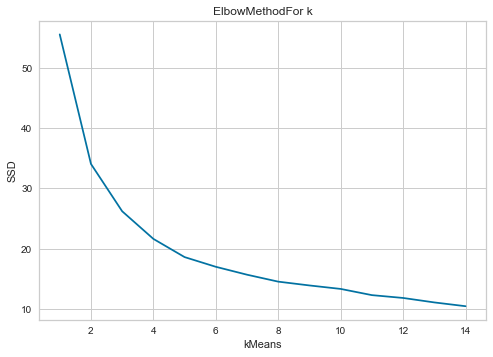

In [26]:
Sum_of_squared_distances = []
K = range(1,15)
for clusters in K:
    km = KMeans(n_clusters=clusters)
    km = km.fit(principalComponents)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances,'bx-')
plt.xlabel('kMeans')
plt.ylabel('SSD')
plt.title('ElbowMethodFor k')
plt.show()

In [27]:
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6]


for K in n_clusters:
    cluster = KMeans (n_clusters= K, random_state= 10)
    p = cluster.fit_predict(s_df)
    score = silhouette_score(s_df, p, random_state= 10)
    print ("For n_clusters = {}, silhouette score is {})".format(K, score))

For n_clusters = 2, silhouette score is 0.3076667180745941)
For n_clusters = 3, silhouette score is 0.2638986537988082)
For n_clusters = 4, silhouette score is 0.248998316778077)
For n_clusters = 5, silhouette score is 0.24881980422387207)
For n_clusters = 6, silhouette score is 0.2241415358334798)


The above score for the cluster 2 is 0.307 which is the highest one. Hence, the ideal value of cluster is 2. Additionally, we are writing the algorithm with 3 cluster

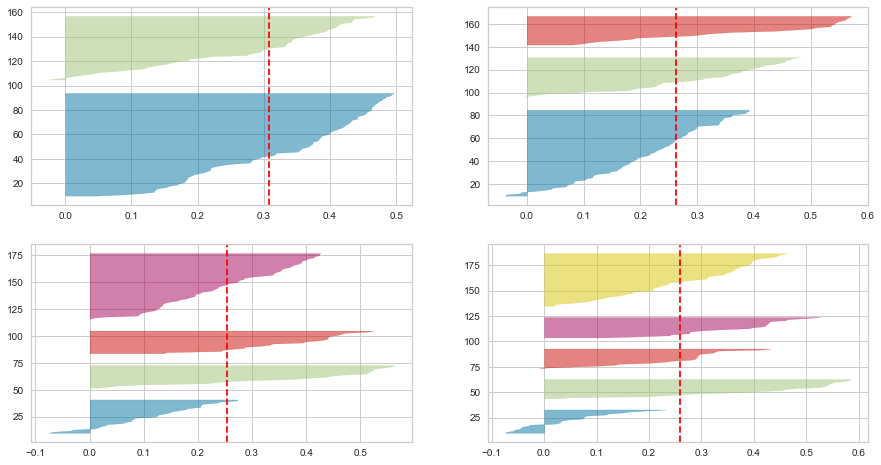

In [28]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
  
   ## Create KMeans instance for different number of clusters
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
   
    ##$Create SilhouetteVisualizer instance with KMeans instance
    #Fit the visualizer
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(s_df)


In [29]:
# Clustering using KMeans
import numpy as np
model = KMeans(n_clusters = 2, init = "k-means++")
label = model.fit_predict(PCA_components)
centers = np.array(model.cluster_centers_)
uniq = np.unique(label)

In [30]:
df['k_means_cluster'] = label
df

,LadderScore,StandardErrorOfLadderScore,LoggedGDPperCapita,SocialSupport,HealthyLifeExpectancy,FreedomToMakeLifeChoices,Generosity,PerceptionsOfCorruption,Dystopia_residual,k_means_cluster
0,7.842,0.032,10.775,0.954,72.000,0.949,-0.098,0.186,3.253,0
1,7.620,0.035,10.933,0.954,72.700,0.946,0.030,0.179,2.868,0
2,7.571,0.036,11.117,0.942,74.400,0.919,0.025,0.292,2.839,0
3,7.554,0.059,10.878,0.983,73.000,0.955,0.160,0.673,2.967,0
4,7.464,0.027,10.932,0.942,72.400,0.913,0.175,0.338,2.798,0
...,...,...,...,...,...,...,...,...,...,...
139,3.775,0.107,6.635,0.490,53.400,0.626,-0.024,0.607,2.876,1
140,3.658,0.070,7.578,0.832,57.122,0.602,-0.147,0.800,1.776,1
141,3.623,0.071,7.876,0.702,57.999,0.833,0.183,0.577,1.263,1
143,3.600,0.092,6.958,0.537,57.948,0.780,0.038,0.729,2.190,1


In [31]:
df['k_means_cluster'].value_counts()

0    84
1    54
Name: k_means_cluster, dtype: int64

In [32]:
# colors for plotting

colors = ['red', 'green']
# assign a color to each features (note that we are using features as target)
features_colors = [ colors[label[i]] for i in range(len(PCA_components.iloc[:,:2])) ]
T=PCA_components.iloc[:,:2]

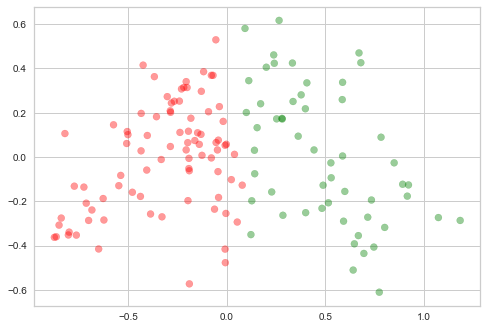

In [33]:
# plot the PCA cluster components
plt.scatter(T[0], T[1],
            c=features_colors, marker='o',
            alpha=0.4
        )

# Project each original feature on the principle component axis, to represent the level of importance of each feature in the multidimensional scaling.

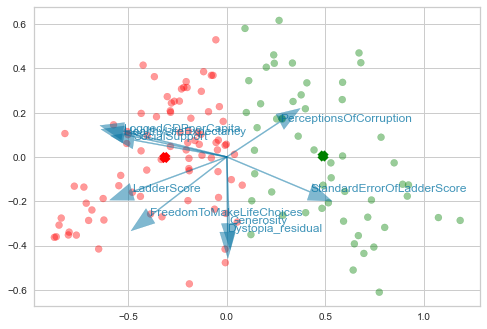

In [34]:
T=PCA_components 
colors = ['red', 'green']
features_colors = [ colors[label[i]] for i in range(len(T)) ]
xvector =  pca.components_[0] * max(T[0])
yvector =  pca.components_[1] * max(T[1])
columns = s_df.columns




# assign a color to each features (note that we are using features as target)
for i in range(len(columns)):
    # plot arrows
    plt.arrow(0, 0, xvector[i], yvector[i],
                color='b', width=0.005,
                head_width=0.08, alpha=0.5
            )
    # plot name of features
    plt.text(xvector[i], yvector[i], list(columns)[i], color='b', alpha=0.75)

plt.scatter(T[0], T[1], 
            c=features_colors, marker='o',
            alpha=0.4)

#plot the centroids
plt.scatter(centers[:, 0], centers[:, 1],
            marker='x', 
            linewidths=6, c=colors )            
plt.show()



# 2. Agglomerative clustering hierarchical clustering after performing dimensionality reduction (PCA)



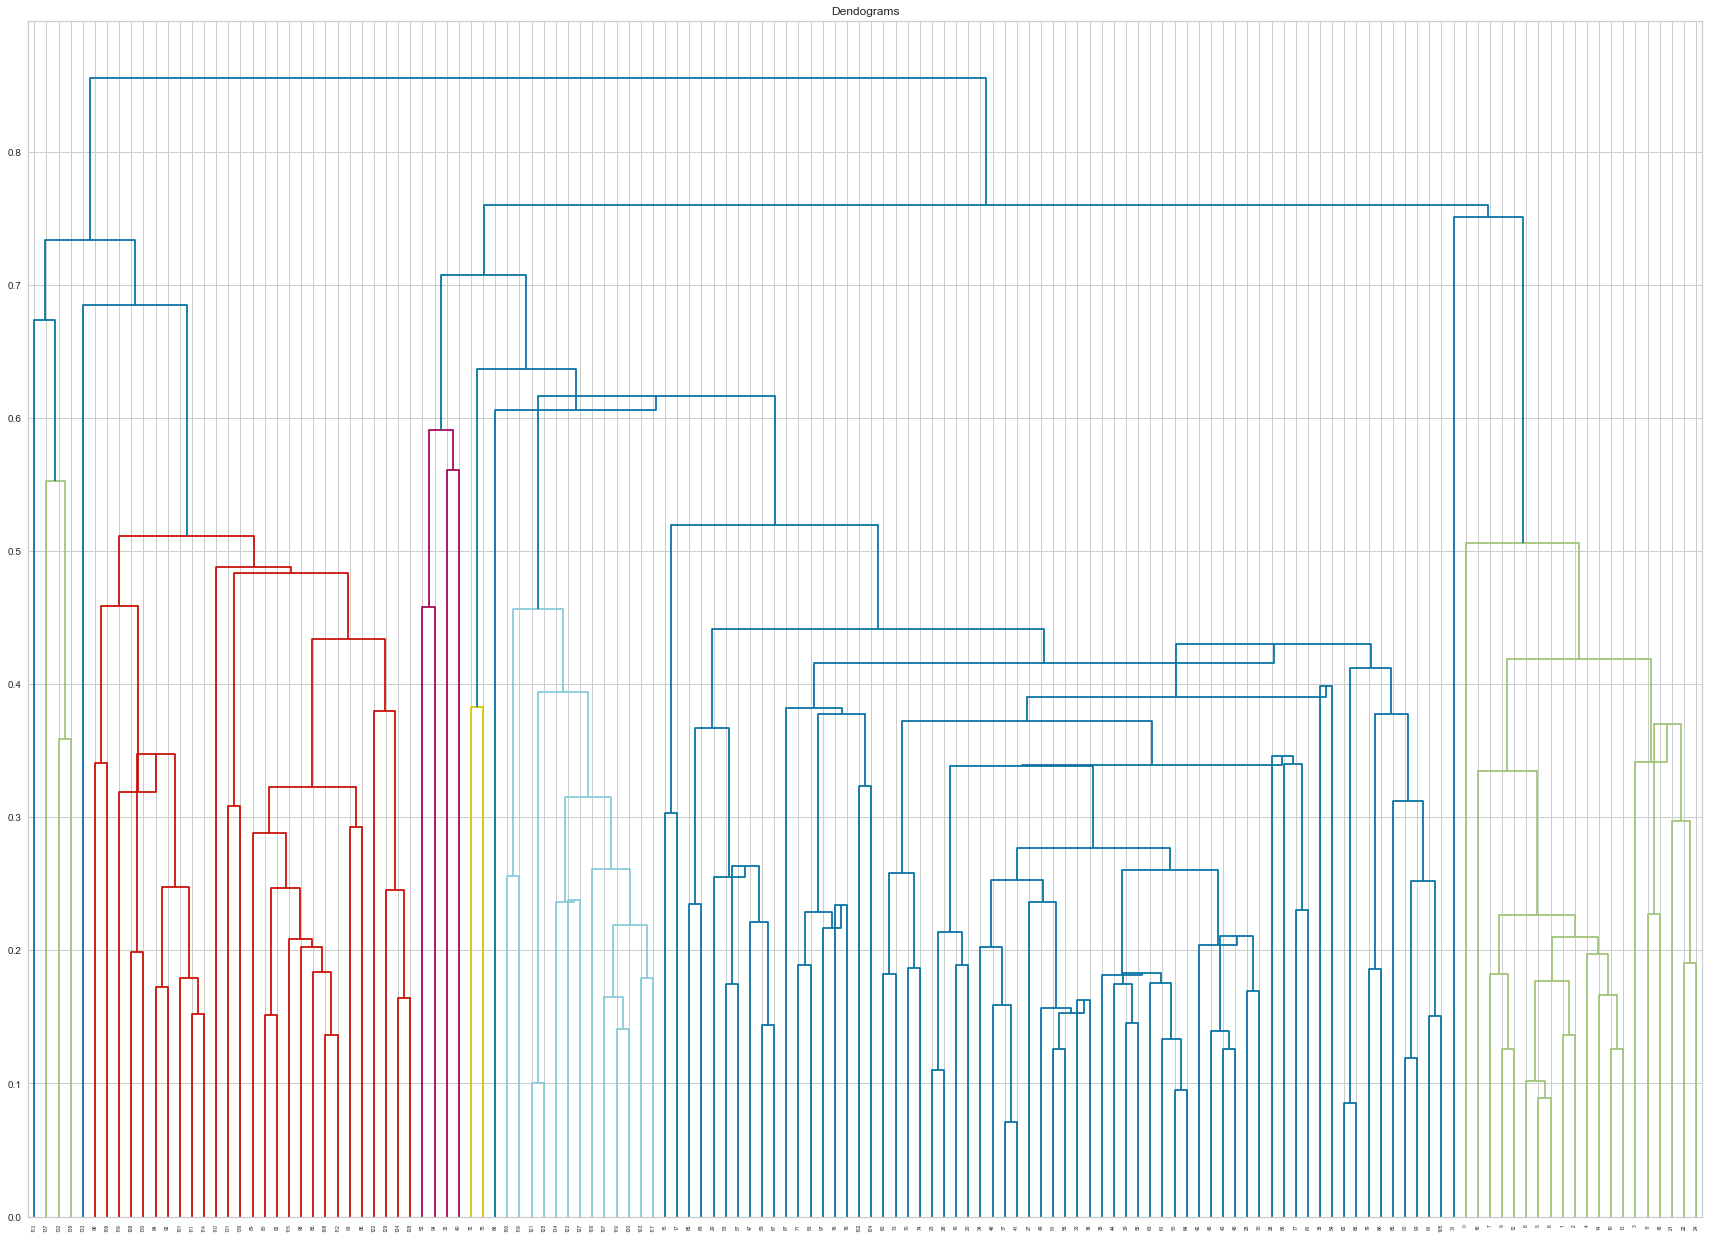

In [35]:
#Dendrogram (centroid linkage)

import scipy.cluster.hierarchy as shc
plt.figure(figsize=(30,22))
plt.title("Dendograms")
dg = shc.dendrogram(shc.linkage(principalComponents, method='centroid'))

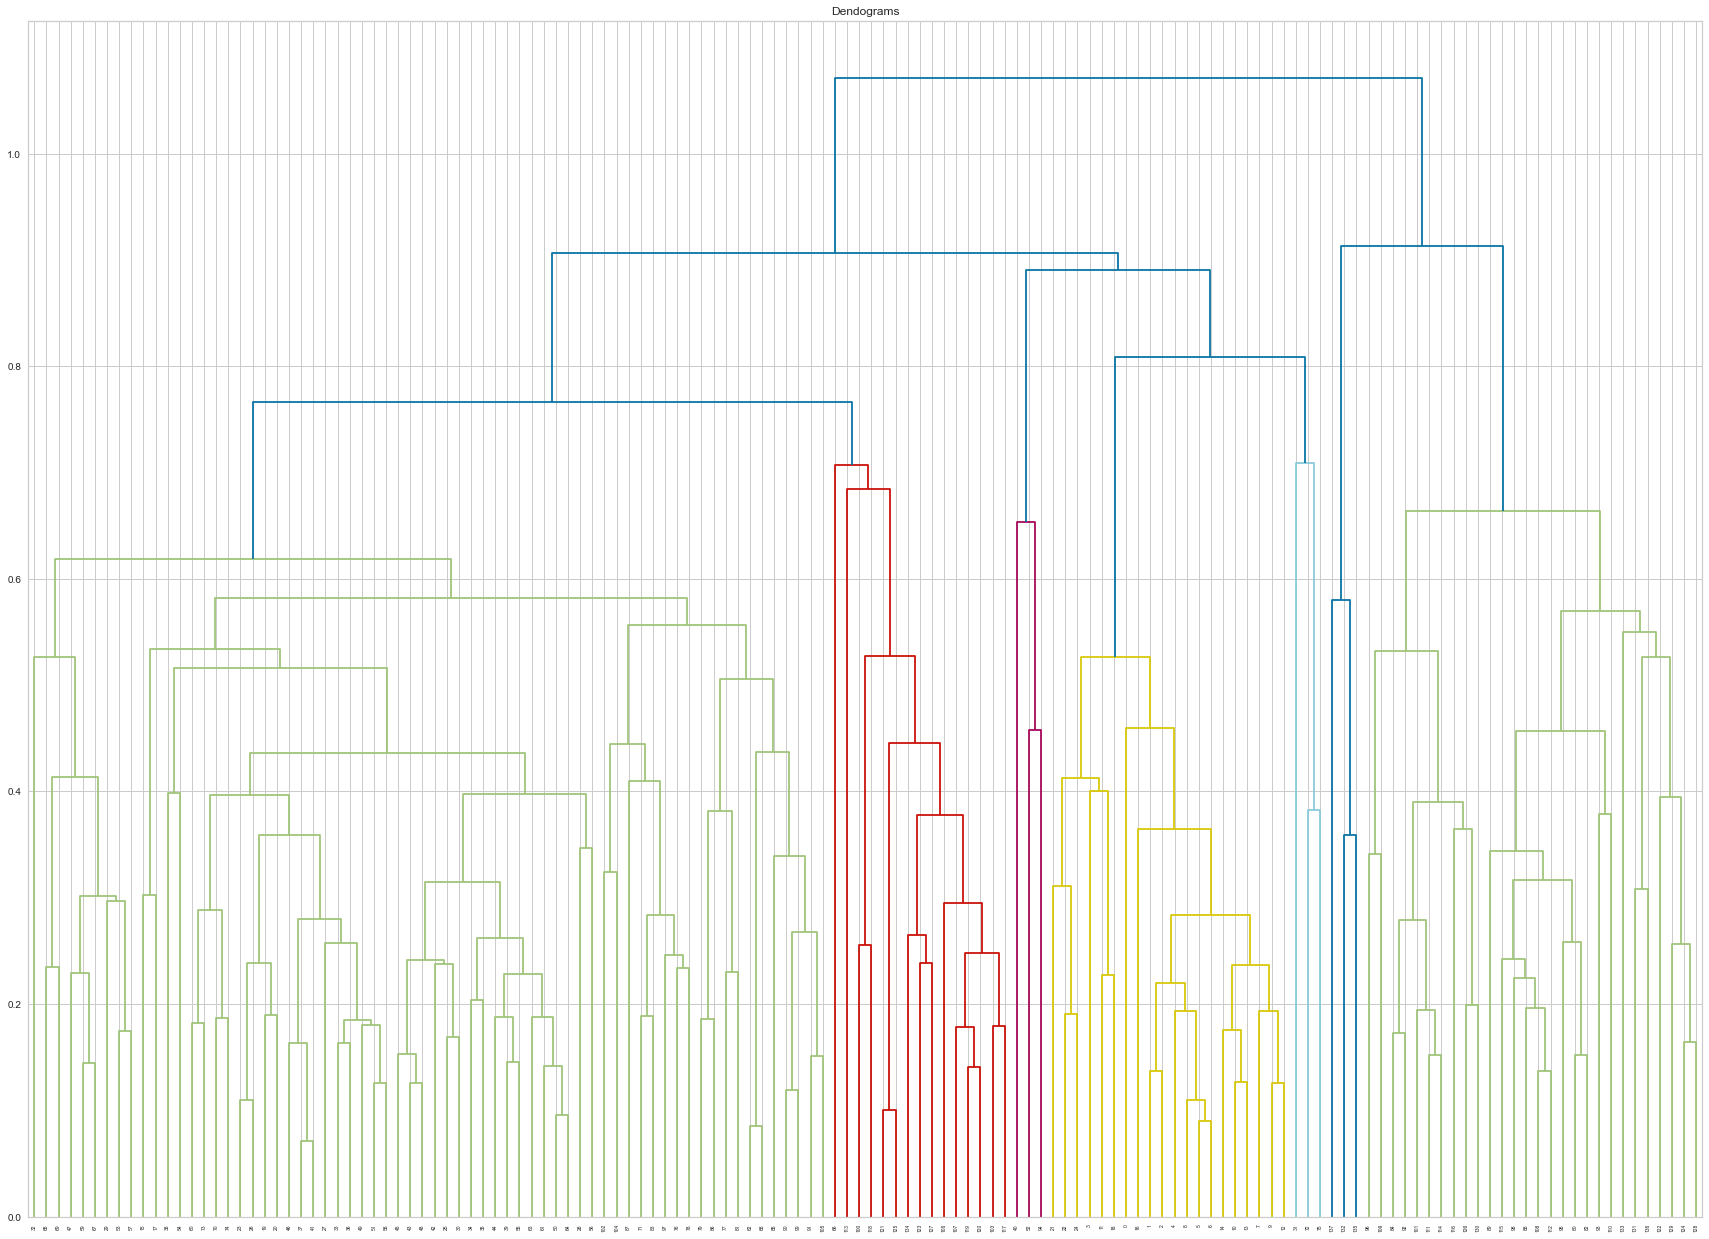

In [36]:
#Dendrogram (average linkage)
 
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(30,22))
plt.title("Dendograms")
dg = shc.dendrogram(shc.linkage(principalComponents, method='average'))

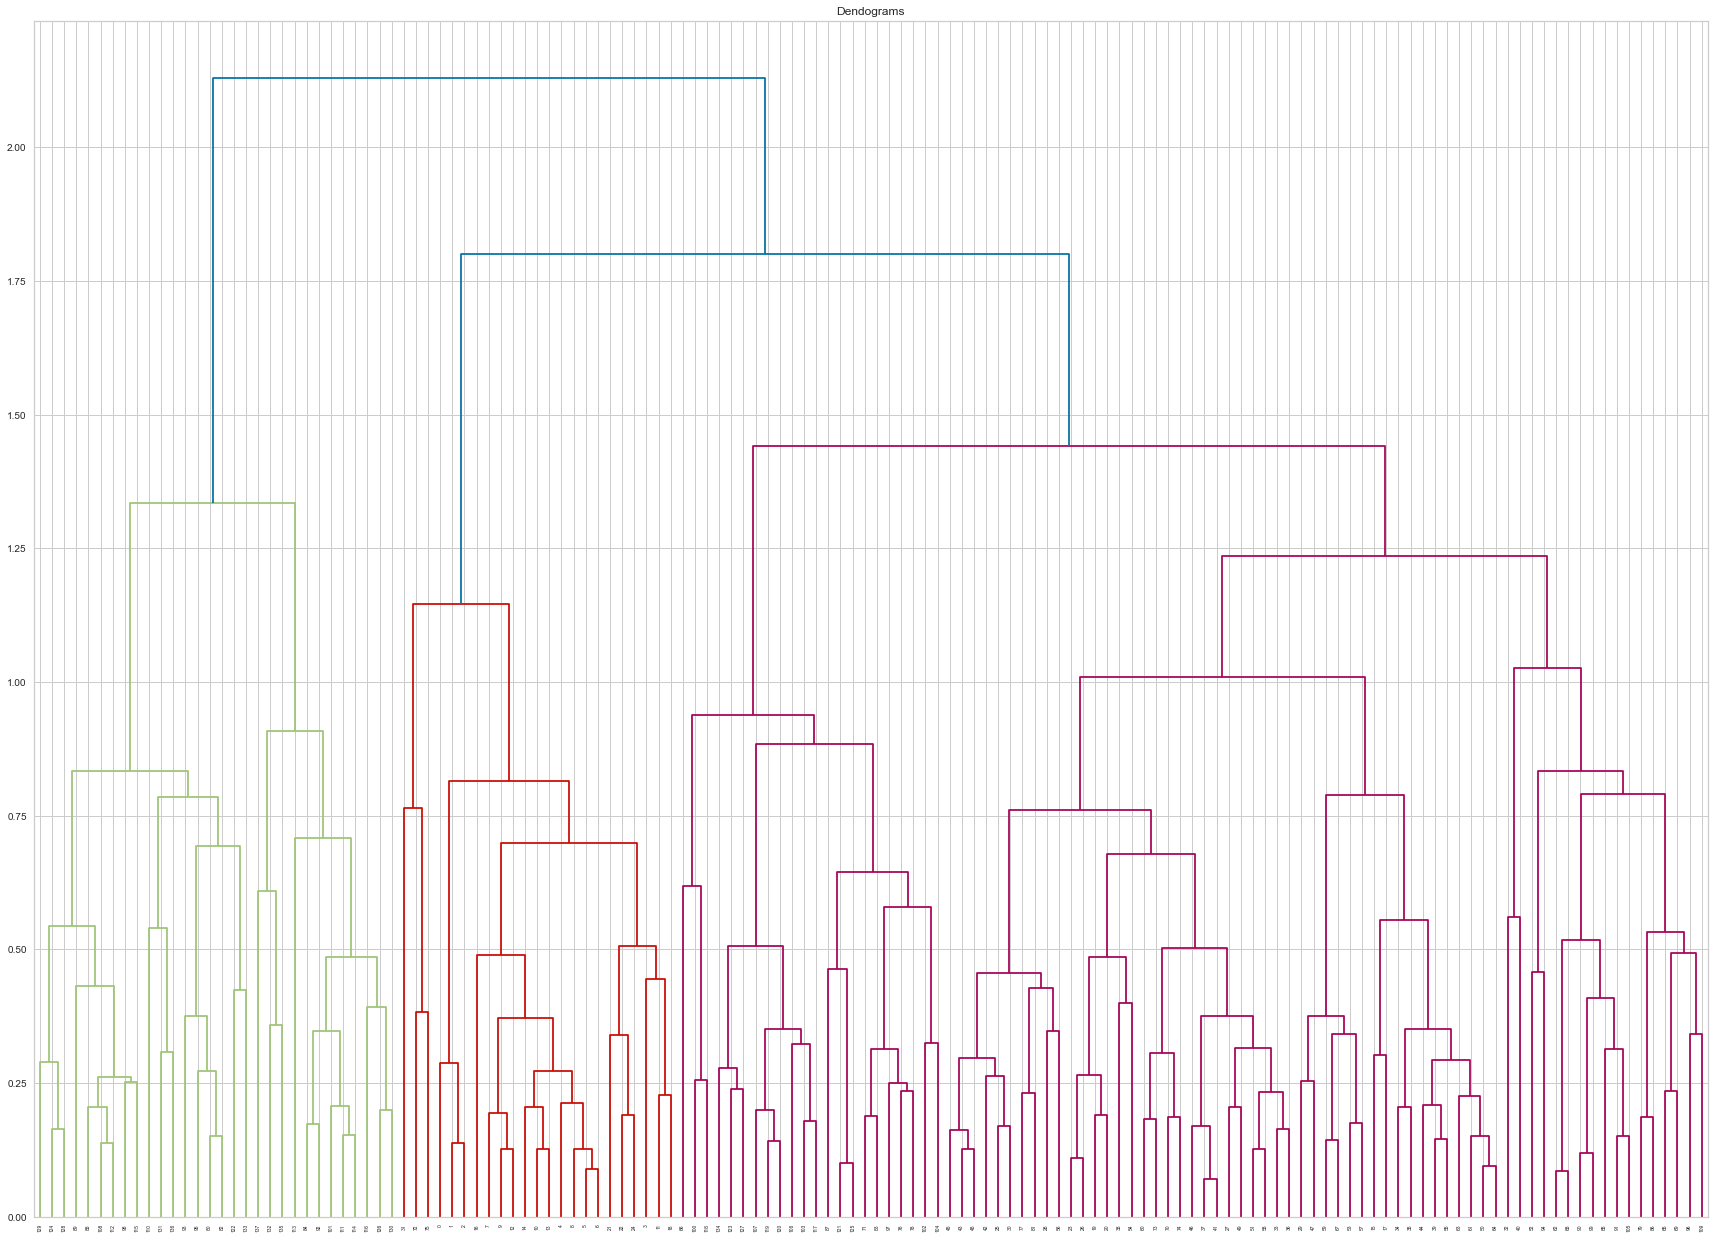

In [37]:
#Dendrogram  (complete linkage)

import scipy.cluster.hierarchy as shc
plt.figure(figsize=(30,22))
plt.title("Dendograms")
dg = shc.dendrogram(shc.linkage(principalComponents, method='complete'))

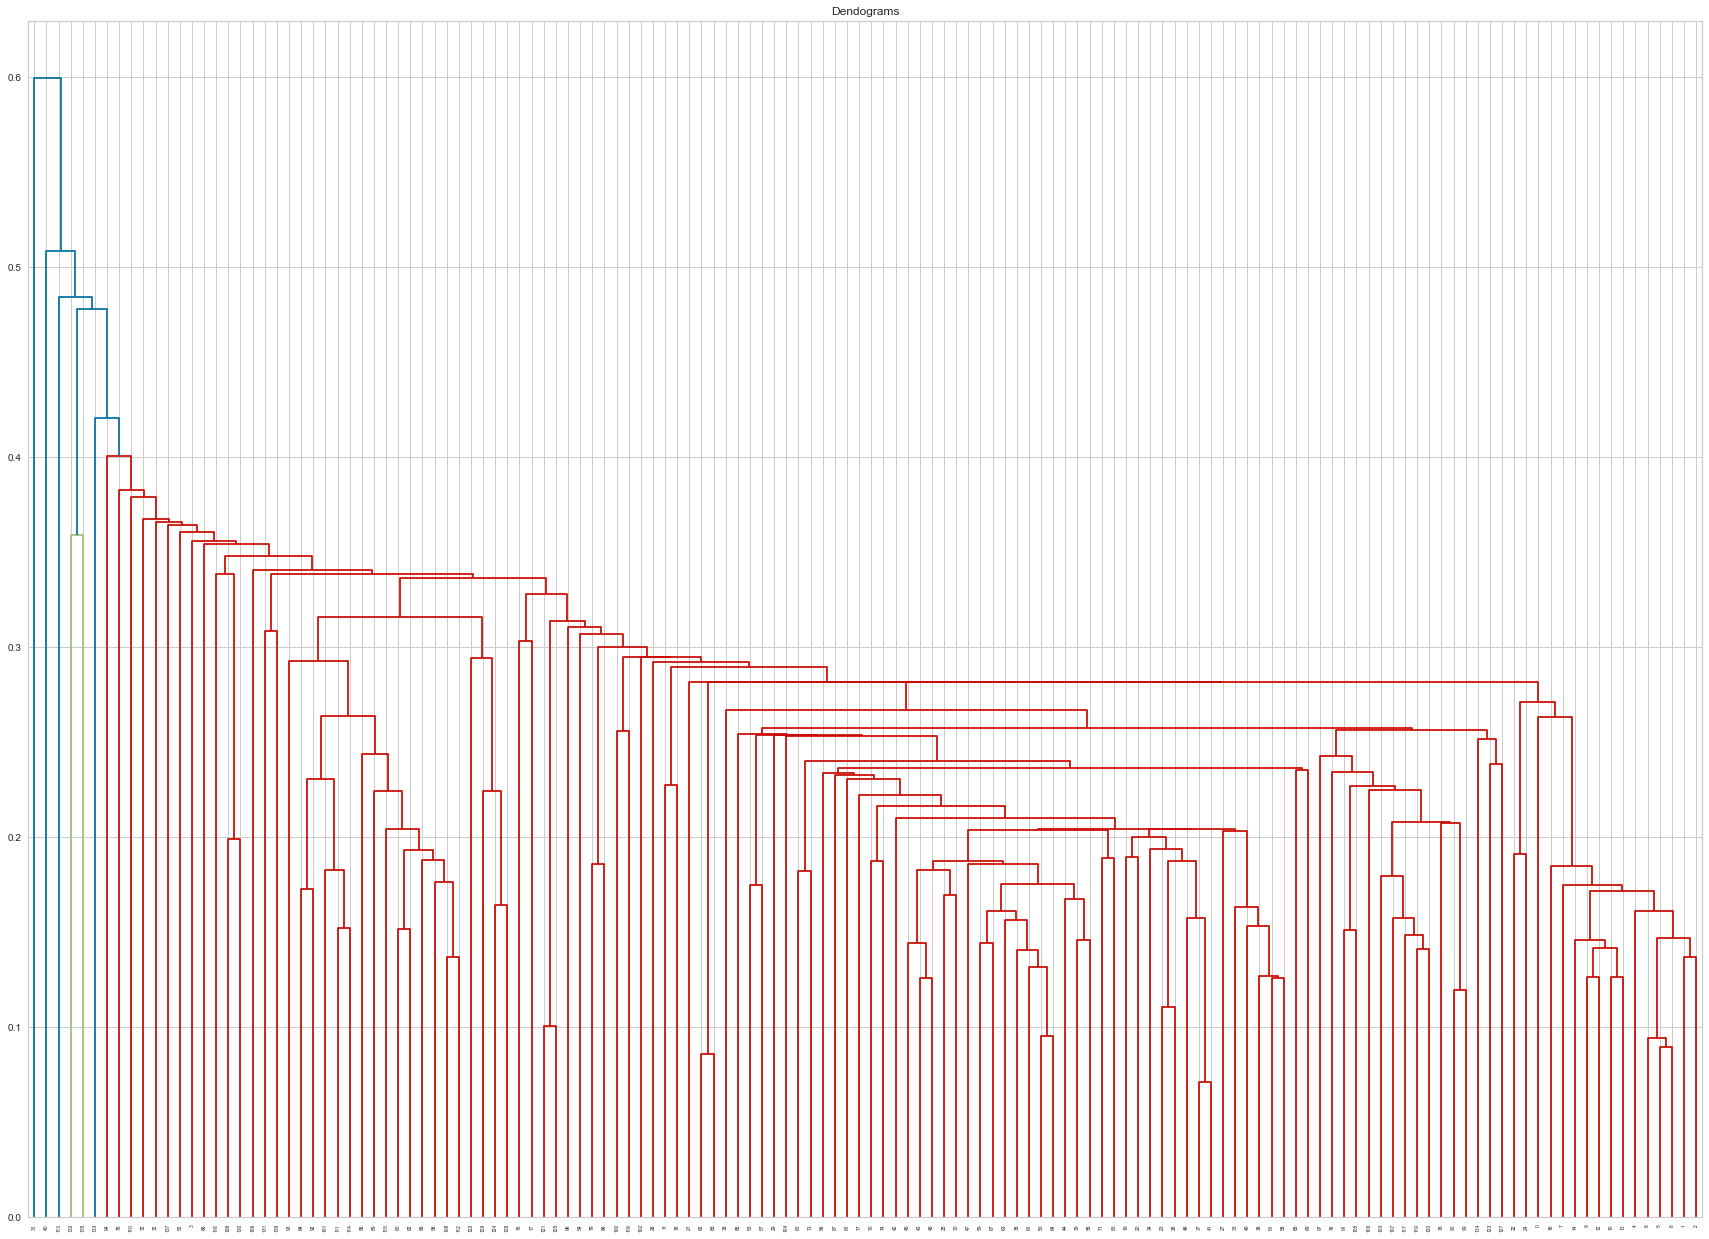

In [38]:
#Dendrogram (single linkage)

import scipy.cluster.hierarchy as shc
plt.figure(figsize=(30,22))
plt.title("Dendograms")
dg = shc.dendrogram(shc.linkage(principalComponents, method='single'))

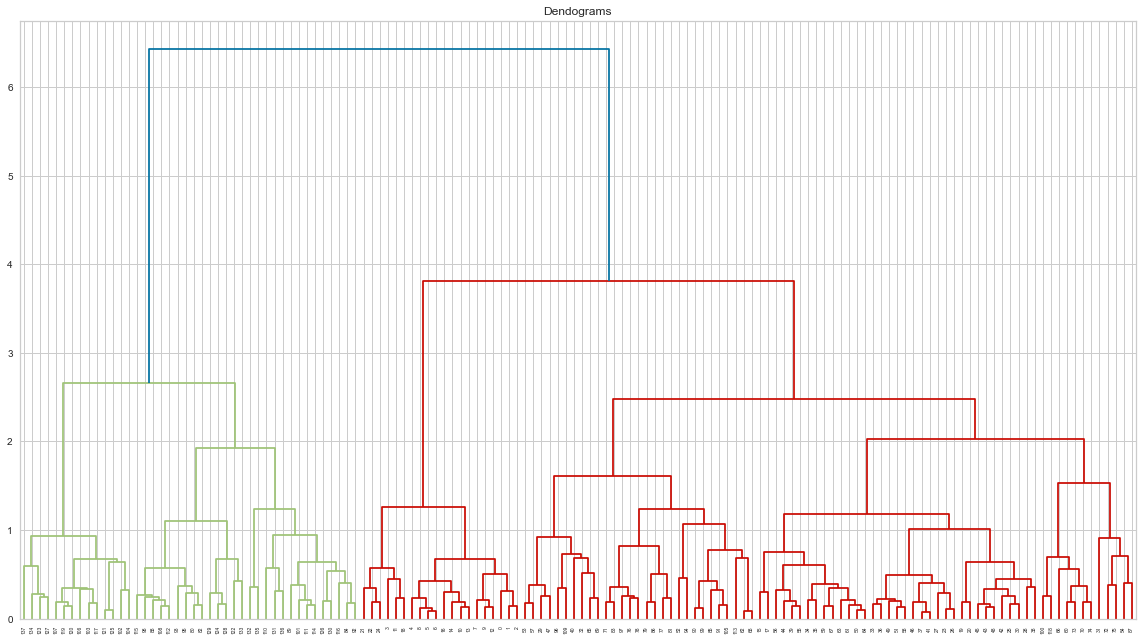

In [39]:
#Dendogram  (Ward method)

import scipy.cluster.hierarchy as shc
plt.figure(figsize=(20,11))
plt.title("Dendograms")
dg = shc.dendrogram(shc.linkage(principalComponents, method='ward'))

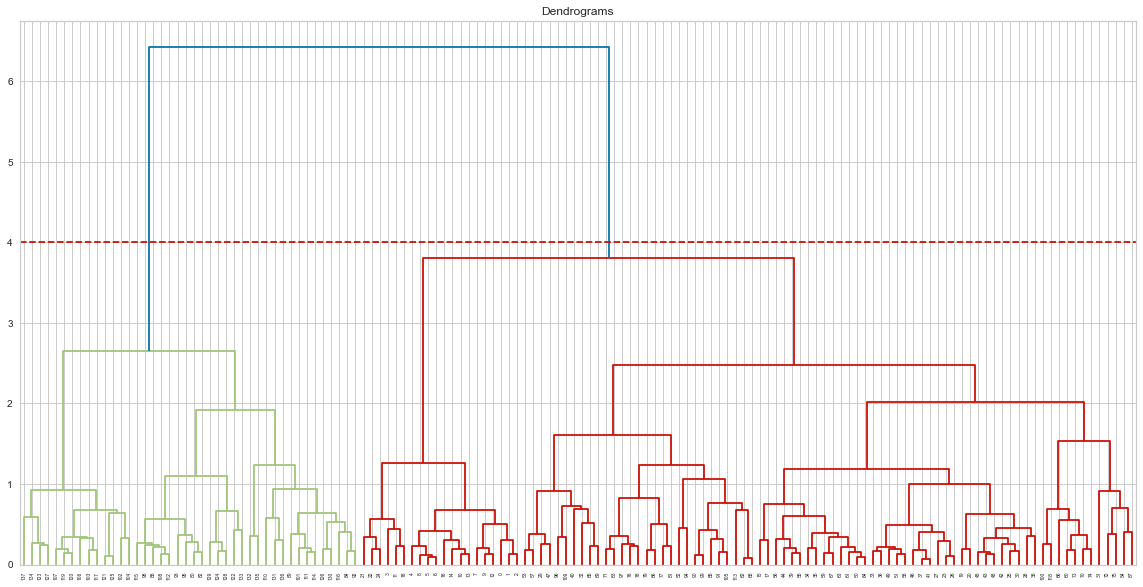

In [40]:
plt.figure(figsize=(20,10))  
plt.title("Dendrograms")  
dg = shc.dendrogram(shc.linkage(principalComponents, method='ward'))
plt.axhline(y=4, color='r', linestyle='--')

## Justify the selected linkage method



In [41]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
Hierical_label = cluster.fit_predict(principalComponents)
Hierical_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

we can see the cluster labels from all of your data points. Since we had 2 clusters, we have three labels in the output i.e. 0 to 1. As a final step, let's plot the clusters to see how actually our data has been clustered:

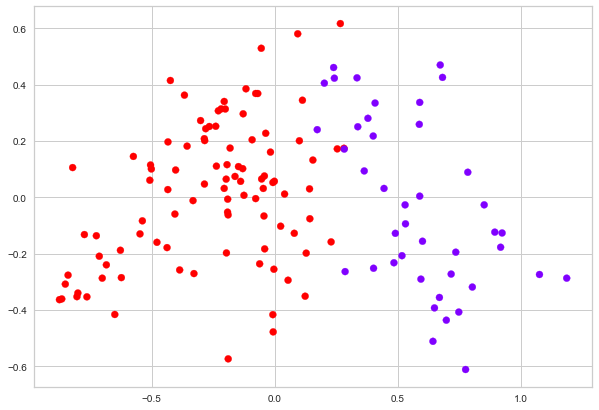

In [42]:
plt.figure(figsize=(10, 7))
plt.scatter(principalComponents[:,0], principalComponents[:,1], c=cluster.labels_, cmap='rainbow_r')



In [43]:
df['Hierical_cluster'] = Hierical_label
df.head(100)

,LadderScore,StandardErrorOfLadderScore,LoggedGDPperCapita,SocialSupport,HealthyLifeExpectancy,FreedomToMakeLifeChoices,Generosity,PerceptionsOfCorruption,Dystopia_residual,k_means_cluster,Hierical_cluster
0,7.842,0.032,10.775,0.954,72.000,0.949,-0.098,0.186,3.253,0,0
1,7.620,0.035,10.933,0.954,72.700,0.946,0.030,0.179,2.868,0,0
2,7.571,0.036,11.117,0.942,74.400,0.919,0.025,0.292,2.839,0,0
3,7.554,0.059,10.878,0.983,73.000,0.955,0.160,0.673,2.967,0,0
4,7.464,0.027,10.932,0.942,72.400,0.913,0.175,0.338,2.798,0,0
...,...,...,...,...,...,...,...,...,...,...,...
98,5.045,0.073,8.087,0.489,54.713,0.757,-0.034,0.661,3.482,1,1
99,5.030,0.045,8.947,0.728,58.968,0.910,0.123,0.658,2.204,1,0
100,5.025,0.046,8.454,0.693,64.800,0.877,-0.041,0.682,2.427,1,0
101,4.984,0.090,7.838,0.639,55.008,0.697,0.095,0.766,3.216,1,1


In [44]:
df['Hierical_cluster'].value_counts()

0    96
1    42
Name: Hierical_cluster, dtype: int64

## Project each original feature on the principle component axis, to represent the level of importance of each feature in the multidimensional scaling

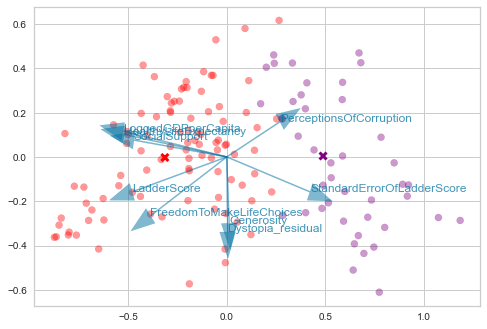

In [45]:
T=PCA_components 
colors = ['red', 'purple']
features_colors = [ colors[Hierical_label[i]] for i in range(len(T)) ]
xvector =  pca.components_[0] * max(T[0])
yvector =  pca.components_[1] * max(T[1])
columns = s_df.columns




# assign a color to each features (note that we are using features as target)
for i in range(len(columns)):
    # plot arrows
    plt.arrow(0, 0, xvector[i], yvector[i],
                color='b', width=0.005,
                head_width=0.08, alpha=0.5
            )
    # plot name of features
    plt.text(xvector[i], yvector[i], list(columns)[i], color='b', alpha=0.75)

plt.scatter(T[0], T[1], 
            c=features_colors, marker='o',
            alpha=0.4)

#plot the centroids
plt.scatter(centers[:, 0], centers[:, 1],
            marker='x', 
            linewidths=3, c=colors )            
plt.show()

# 3.Critically summarise the business value of the clustering analysis with reference to the given domain; 



In [46]:
df.insert(0,'Country Name', df1.iloc[:,0])
utopia=df.sort_values('LadderScore', ascending=False)
utopia

,Country Name,LadderScore,StandardErrorOfLadderScore,LoggedGDPperCapita,SocialSupport,HealthyLifeExpectancy,FreedomToMakeLifeChoices,Generosity,PerceptionsOfCorruption,Dystopia_residual,k_means_cluster,Hierical_cluster
0,Finland,7.842,0.032,10.775,0.954,72.000,0.949,-0.098,0.186,3.253,0,0
1,Denmark,7.620,0.035,10.933,0.954,72.700,0.946,0.030,0.179,2.868,0,0
2,Switzerland,7.571,0.036,11.117,0.942,74.400,0.919,0.025,0.292,2.839,0,0
3,Iceland,7.554,0.059,10.878,0.983,73.000,0.955,0.160,0.673,2.967,0,0
4,Netherlands,7.464,0.027,10.932,0.942,72.400,0.913,0.175,0.338,2.798,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
139,Burundi,3.775,0.107,6.635,0.490,53.400,0.626,-0.024,0.607,2.876,1,1
140,Yemen,3.658,0.070,7.578,0.832,57.122,0.602,-0.147,0.800,1.776,1,1
141,Tanzania,3.623,0.071,7.876,0.702,57.999,0.833,0.183,0.577,1.263,1,1
143,Malawi,3.600,0.092,6.958,0.537,57.948,0.780,0.038,0.729,2.190,1,1


In [47]:
dystopia=df.sort_values('LadderScore', ascending=True)
dystopia

,Country Name,LadderScore,StandardErrorOfLadderScore,LoggedGDPperCapita,SocialSupport,HealthyLifeExpectancy,FreedomToMakeLifeChoices,Generosity,PerceptionsOfCorruption,Dystopia_residual,k_means_cluster,Hierical_cluster
147,Zimbabwe,3.145,0.058,7.943,0.750,56.201,0.677,-0.047,0.821,1.205,1,1
143,Malawi,3.600,0.092,6.958,0.537,57.948,0.780,0.038,0.729,2.190,1,1
141,Tanzania,3.623,0.071,7.876,0.702,57.999,0.833,0.183,0.577,1.263,1,1
140,Yemen,3.658,0.070,7.578,0.832,57.122,0.602,-0.147,0.800,1.776,1,1
139,Burundi,3.775,0.107,6.635,0.490,53.400,0.626,-0.024,0.607,2.876,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4,Netherlands,7.464,0.027,10.932,0.942,72.400,0.913,0.175,0.338,2.798,0,0
3,Iceland,7.554,0.059,10.878,0.983,73.000,0.955,0.160,0.673,2.967,0,0
2,Switzerland,7.571,0.036,11.117,0.942,74.400,0.919,0.025,0.292,2.839,0,0
1,Denmark,7.620,0.035,10.933,0.954,72.700,0.946,0.030,0.179,2.868,0,0


<AxesSubplot:>

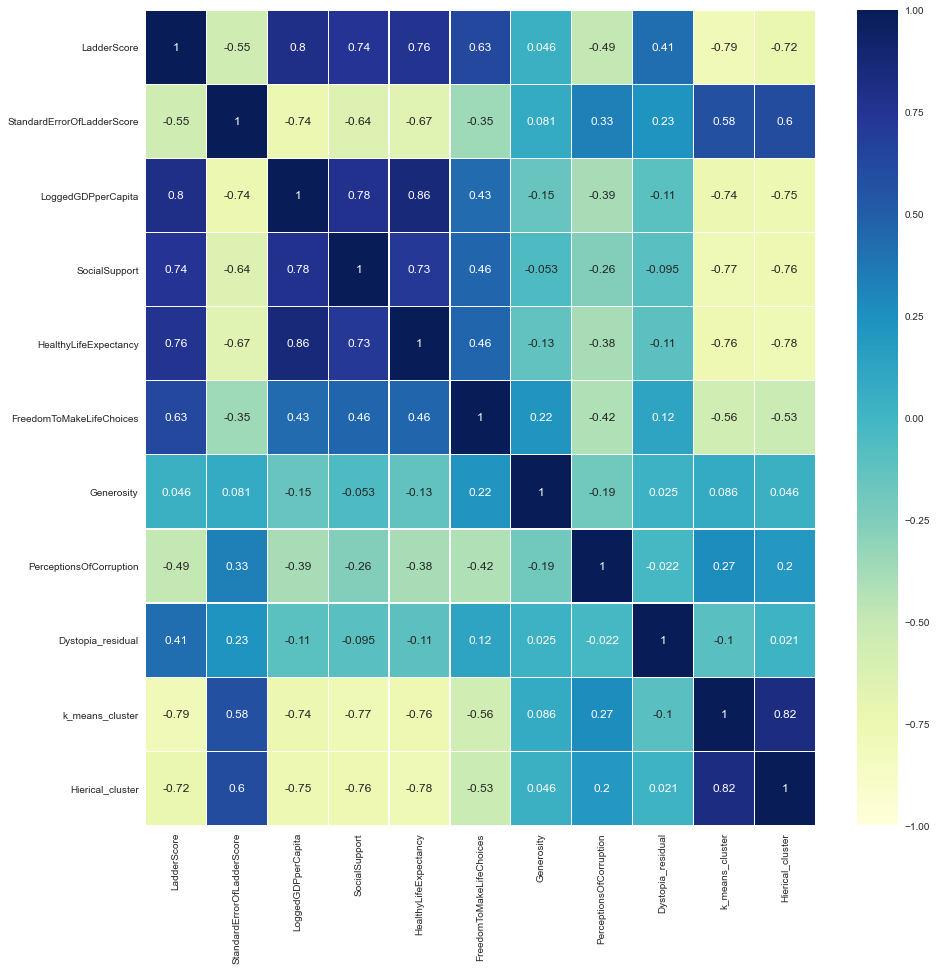

In [48]:
plt.figure(figsize =(15,15))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", vmin=-1, vmax=1, linewidths=.2)